In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

## CNN - CONV, POOL, FLAT, CONNECT

In [2]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))# sigmoid for binary

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5319 images belonging to 2 classes.
Found 2032 images belonging to 2 classes.


In [5]:
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 1800,
                         epochs = 10,
                         validation_data = test_set)

Epoch 1/10
1800/1800 [==============================] - 142s 79ms/step - loss: 0.4409 - accuracy: 0.7942 - val_loss: 0.6538 - val_accuracy: 0.7037
Epoch 2/10
1800/1800 [==============================] - 139s 77ms/step - loss: 0.3764 - accuracy: 0.8298 - val_loss: 0.7853 - val_accuracy: 0.6713
Epoch 3/10
1800/1800 [==============================] - 143s 79ms/step - loss: 0.3196 - accuracy: 0.8603 - val_loss: 0.6337 - val_accuracy: 0.7244
Epoch 4/10
1800/1800 [==============================] - 146s 81ms/step - loss: 0.2595 - accuracy: 0.8893 - val_loss: 0.6788 - val_accuracy: 0.7333
Epoch 5/10
1800/1800 [==============================] - 142s 79ms/step - loss: 0.2103 - accuracy: 0.9148 - val_loss: 0.9075 - val_accuracy: 0.7170
Epoch 6/10
1800/1800 [==============================] - 145s 81ms/step - loss: 0.1681 - accuracy: 0.9325 - val_loss: 1.2349 - val_accuracy: 0.6801
Epoch 7/10
1800/1800 [==============================] - 143s 79ms/step - loss: 0.1417 - accuracy: 0.9452 - val_loss: 1

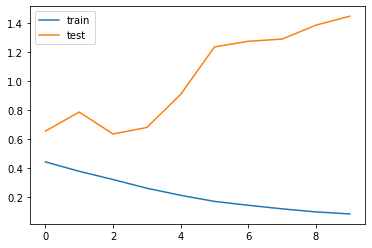

In [6]:
from matplotlib import pyplot as plt
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [7]:
import numpy as np
from tensorflow.keras.preprocessing import image
# loading an image from the disk
test_image = image.load_img('random_cat.jpg', target_size = (64, 64))
# converting the image to a numpy array
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
# print(training_set.class_indices)
# our cut-off
if result[0][0] >= 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

dog


In [8]:
"""
lecture notes
softmax for multiple classification
sigmoid for binary classification
tanh for -1 to 1
"""

'\nlecture notes\nsoftmax for multiple classification\nsigmoid for binary classification\ntanh for -1 to 1\n'